In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import fixed_point
from tqdm import tqdm

In [113]:
crange = np.linspace(0, 5, 100)
n_ap = []
N = 100
nruns = 100
tvals = range(4)

for c in tqdm(crange):

    num = np.zeros(len(tvals), dtype=float)

    for _ in range(nruns):

        G = nx.erdos_renyi_graph(N, c / (N-1))

        for i in range(len(tvals)):

            points = list(nx.articulation_points(G))
            num[i] += len(points) / len(G)
            G.remove_nodes_from(points)

    n_ap.append(num / nruns)

n_ap = np.array(n_ap)

100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


In [114]:
n_ap.shape

(100, 4)

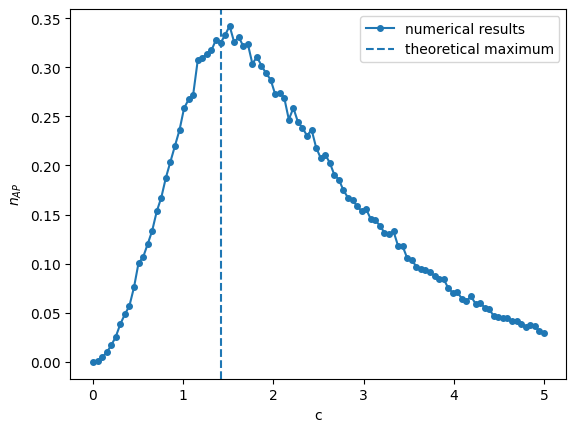

In [115]:
plt.plot(crange, n_ap[:, 0], '-o', ms=4, lw=1.5, label='numerical results')
# plt.plot(crange, nth, '-')
plt.axvline(x=1.41868, ls='--', label='theoretical maximum')
plt.xlabel('c')
plt.ylabel('$n_{AP}$')
plt.legend();

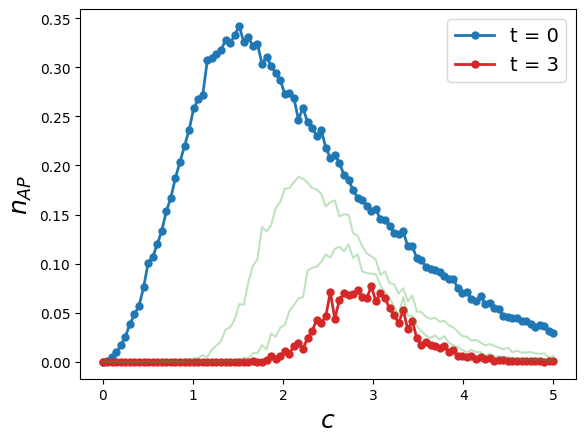

In [116]:
lw, ms = 2, 5
plt.plot(crange, n_ap[:, 0], 'o-', lw=lw, ms=ms, color='tab:blue', label=f't = {0}')
plt.plot(crange, n_ap[:, -1], 'o-', lw=lw, ms=ms, color='tab:red', label=f't = {tvals[-1]}')
plt.plot(crange, n_ap[:, 1:-1], '-', color='tab:green', alpha=.3)
plt.xlabel('$c$', fontdict={'size': 18})
plt.ylabel('$n_{AP}$', fontdict={'size': 18})
plt.legend(fontsize=14)
plt.savefig('plots/monoplex_ap.png')

In [89]:
def P(k, c):
    return poisson.pmf(k, mu=c)

In [37]:
def G(x, c):
    return np.exp(-c * (1. - x))

In [38]:
alpha0 = .1 * np.ones_like(crange)
alpha = fixed_point(G, alpha0, args=(crange,))

n_ap_ana = 1 - G(1 - alpha, crange) - crange * alpha * G(np.zeros_like(crange), crange)

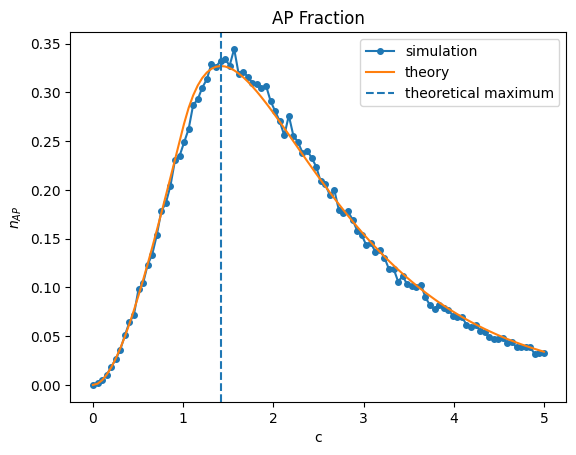

In [39]:
plt.plot(crange, n_ap, '-o', ms=4, lw=1.5, label='simulation')
plt.plot(crange, n_ap_ana, '-', label='theory')
plt.axvline(x=1.41868, ls='--', label='theoretical maximum')
plt.xlabel('c')
plt.ylabel('$n_{AP}$')
plt.legend()
plt.title('AP Fraction')
plt.savefig('plots/ap_distribution.png')